In [1]:
# Démarrage de l'exercice 1
import visualID as vID
from visualID import color
vID.init()

**Début à:** Friday 03 June 2022, 12:30:03  
**Hostname:** insa-11357 (Linux)

<p style="text-align: center"><img width="800px" src="./svg/logoBegin.svg" style="margin-left:auto; margin-right:auto"/></p>

### Pandas. Suggestion de petite(s) application(s) en autonomie. Corrigé

#### Recherche de corrélation entre données 

**La première partie a pour but de créer des données au format pandas. Certaines sont corrélées entre elles. On va vérifier que la carte thermique est cohérente avec les corrélations**


Création des données. Vous n'avez aucune intervention à faire dans cette cellule, à part l'exécuter. On va générer :
- un jeu de 100 valeurs aléatoires X1, comprises entre [-10, 10]
- un deuxième jeu de 100 valeurs aléatoires X2, dans le même intervalle
- des valeurs bruitées, autour d'une fonction $f_1(x)=2x$
- des valeurs bruitées, autour d'une fonction $f_2(x)=-3x$  


Pour $f_1$ et $f_2$, les valeurs de $x$ seront celles du tableau X1

In [2]:
import numpy as np 
import seaborn as sb
from pylab import *
import random

def noiseF(f, X):
    noise = 2
    N = noise * np.random.normal(0,1,(nbp,1))
    # c_ "translates slice objects to concatenation along the second axis of the resulting 2D array" (cf doc)
    # en d'autres termes on concatène les colonnes de A & B quand on appelle c_(A,B) 
    tab = np.c_[X,f(X)+N]
    return tab 

def f1(x):
    return 2*x
def f2(x):
    return -3*x

nbp = 100
xmin = -10
xmax = 10. 
# vecteurs X1 & X2
# random.uniform(low=0.0, high=1.0, size=None)
X1 = np.random.uniform(xmin,xmax,(nbp,1))
X2 = np.random.uniform(xmin,xmax,(nbp,1))

data1 = noiseF(f1,X1)
data2 = noiseF(f2,X1)

On va tracer les 2 fonctions pour voir à quoi elles ressemblent.  Vérifiez de visu que les distributions de points sont cohérentes avec les expressions des fonctions

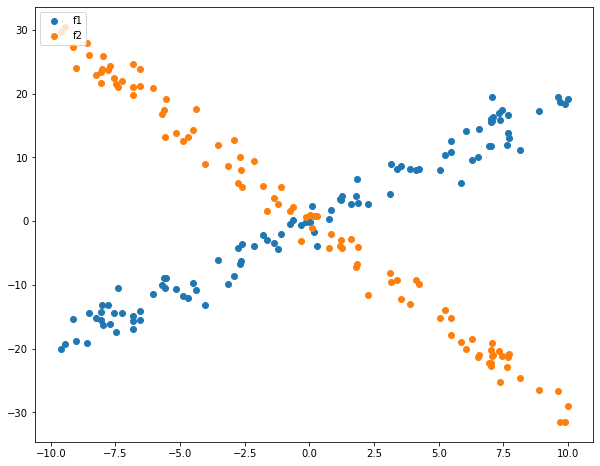

In [3]:
figure(figsize = (10,8))
scatter(data1[:,0],data1[:,1],label='f1')
scatter(data2[:,0],data2[:,1],label='f2')
legend(loc="upper left")

On va maintenant stocker ces données au format pandas dans un tableau nommé `df`. Les deux premières colonnes du tableau `df` vont contenir les valeurs de X1 et X2, et les suivantes les valeurs que prennent les fonctions f1 et f2 pour chacune des valeurs de X1

In [4]:
import pandas as pd
df = pd.DataFrame(X1, columns = ['X1'])
df['Xb'] = pd.DataFrame(X2)
df['f1'] = pd.DataFrame(data1[:,1])
df['f2'] = pd.DataFrame(data2[:,1])

<div class="warn"><b>Maintenant, à vous de jouer</b></div> 
(1) afficher le tableau `df`, qui contient les données

In [5]:
display(df)

,X1,Xb,f1,f2
0,-0.750952,2.529314,-0.433689,1.510744
1,-5.597388,-9.930111,-10.433569,13.182113
2,-7.244377,-9.731810,-14.419437,22.034843
3,-1.782094,5.980281,-2.250567,5.567770
4,4.219844,7.122871,8.210079,-9.930794
...,...,...,...,...
95,7.037409,6.482127,15.595830,-22.750333
96,9.994131,0.472645,19.134530,-29.018400
97,-9.617595,-9.266487,-20.047527,29.688642
98,7.698222,7.034221,13.087899,-20.833757


(2) Afficher un aperçu de la distribution statistique des données (*suggestion*: utiliser la fonction `describe` de pandas)

In [6]:
df.describe()

,X1,Xb,f1,f2
count,100.000000,100.000000,100.000000,100.000000
mean,-0.095954,0.194954,-0.337861,0.349914
std,5.903492,5.859064,11.888741,17.910138
min,-9.617595,-9.985021,-20.047527,-31.532949
25%,-5.607265,-4.643951,-11.011798,-18.029386
50%,-0.053228,0.777691,-0.310729,0.785362
75%,5.575589,5.237302,10.131445,17.504958
max,9.994131,9.597593,19.483154,30.487575


(3) Tracer toutes ces données les unes en fonctions des autres (*suggestion*: utiliser la fonction `pairplot` de pandas)

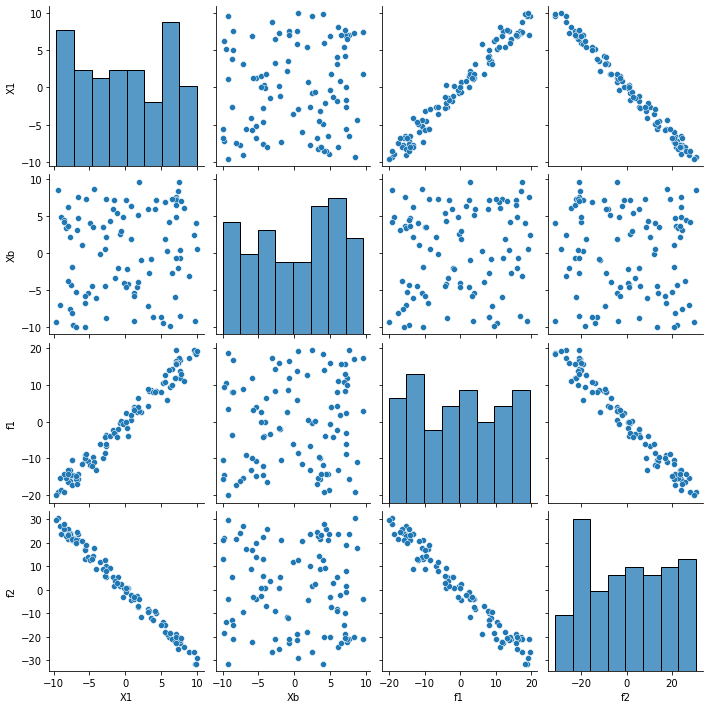

In [7]:
sb.pairplot(df)

(4) Tracer une carte thermique (*suggestion*: utiliser la fonction `heatmap` de pandas)

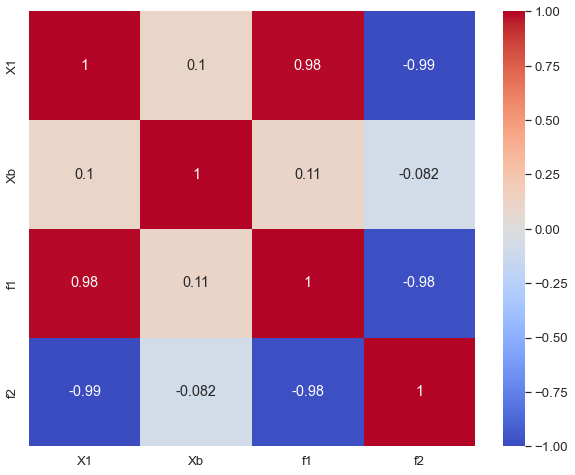

In [8]:
plt.figure(figsize = (10,8))
sb.set(font_scale=1.2)
fig = sb.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap='coolwarm')
savefig("svg/heatmap1.png")

<div class="warn">
Si tout va bien, vous venez d'obtenir la carte thermique suivante (<i>les valeurs peuvent légèrement changer compte tenu du bruit statistique,</i> cf variable <code>noise</code></i>):
<p style="text-align: center"><img src="./svg/heatmap1.png" style="margin-left:auto; margin-right:auto" id="img_heatmap1"/></p>   
    
<b>Commentaires</b><br>
    <li> les deux séries de variables X1 et X2 ont été générées aléatoirement. Les deux séries sont indépendantes l'une de l'autre, ou bien cela signifierait qu'il y a un problème avec le générateur utilisé
    <li> f1 et f2 sont des fonctions des nombres contenus dans X1. Il ne peut donc pas y avoir de corrélation statistique avec X2.
    <li> f1 étant une fonction croissante de X1 (au bruit statistique près), il y a corrélation positive entre les deux. On ne peut pas onbtenir 1 à cause de la petite fluctuation positive introduite (reprenez le sujet et créez un bruit élevé en augmentant la valeur de <code>noise</code>). 
    <li> il y a une forte corrélation négative entre f2 et X1, puisque f2 est une fonction qui décroit en fonction de X1
    <li> la forte corrélation négative entre f1 et f2 est également attendue
</div>

In [9]:
vID.end()

**Fin à:** Friday 03 June 2022, 11:30:28  
**Durée:** 00:00:07 000ms

<p style="text-align: center"><img width="800px" src="./svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>